<a href="https://colab.research.google.com/github/00hamza00/CE888-Data-Science-and-Decision-Making/blob/master/Lab_7/Lab_7_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import keras

from keras.layers import  GlobalAveragePooling2D,Dropout,Dense
from keras.models import Model
from keras.optimizers import Adam

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = "hamzaakram" # username from the json file
os.environ['KAGGLE_KEY'] = "56b732da40a736c84dbe114a60509b72" # key from the json file
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia # api copied from kaggle

100% 2.29G/2.29G [00:31<00:00, 37.1MB/s]
100% 2.29G/2.29G [00:31<00:00, 78.9MB/s]


In [3]:
!ls

chest-xray-pneumonia.zip  sample_data


In [4]:
!unzip chest-xray-pneumonia.zip


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [2]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


Training_data= "chest_xray/train"
Testing_data= "chest_xray/test"
Validation_data= "chest_xray/val"

training_datagen = ImageDataGenerator(rescale=1./255)
testting_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(Training_data, target_size=(256, 256), batch_size=6, class_mode='binary')

test_generator = testting_datagen.flow_from_directory(Testing_data, target_size=(256, 256), batch_size=6, class_mode='binary')

validation_generator = testting_datagen.flow_from_directory(Validation_data, target_size=(256, 256), batch_size=6, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# **The dataset for the validation is very small so will use the test dataset for vaidation**


In [0]:

b_model = keras.applications.resnet.ResNet50(include_top=False, weights=None,  input_shape=(256,256,3),  classes=1)

x = b_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation= 'softmax')(x)
model = Model(inputs = b_model.input, outputs = predictions)

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(),
              metrics=['acc'])

In [17]:
Trained_Model = model.fit_generator(train_generator,
                              steps_per_epoch=300,
                              epochs=20,
                              validation_data=test_generator,
                              validation_steps=50)

Epoch 1/20
300/300 [==============================] - 36s 120ms/step - loss: 4.1273 - acc: 0.7411 - val_loss: 6.0581 - val_acc: 0.6200
Epoch 2/20
300/300 [==============================] - 36s 119ms/step - loss: 4.0653 - acc: 0.7450 - val_loss: 5.7393 - val_acc: 0.6400
Epoch 3/20
300/300 [==============================] - 36s 121ms/step - loss: 4.1184 - acc: 0.7417 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 4/20
300/300 [==============================] - 36s 120ms/step - loss: 4.1184 - acc: 0.7417 - val_loss: 5.8455 - val_acc: 0.6333
Epoch 5/20
300/300 [==============================] - 36s 120ms/step - loss: 4.2779 - acc: 0.7317 - val_loss: 5.5267 - val_acc: 0.6533
Epoch 6/20
300/300 [==============================] - 36s 121ms/step - loss: 3.8616 - acc: 0.7578 - val_loss: 6.3238 - val_acc: 0.6033
Epoch 7/20
300/300 [==============================] - 36s 119ms/step - loss: 4.3044 - acc: 0.7300 - val_loss: 6.6958 - val_acc: 0.5800
Epoch 8/20
300/300 [==============================] - 3

In [0]:
model.save('Resnet50_weights.h5')



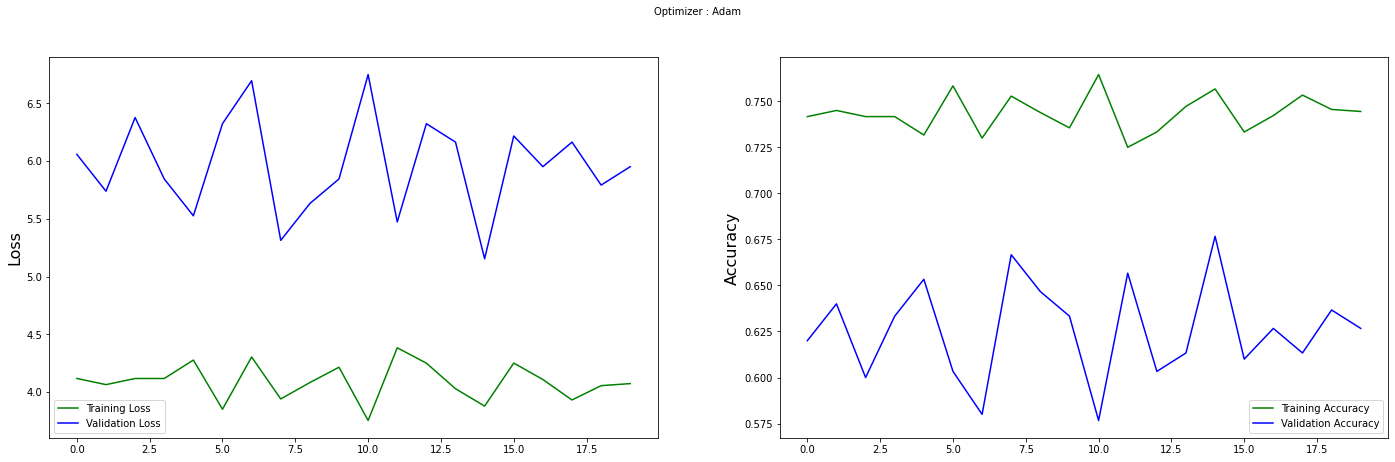

In [23]:
plt.figure(figsize=(24,7))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(Trained_Model.history['loss'], color='g', label='Training Loss')
plt.plot(Trained_Model.history['val_loss'], color='b', label='Validation Loss')
plt.legend(loc='lower left')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(Trained_Model.history['acc'], color='g', label='Training Accuracy')
plt.plot(Trained_Model.history['val_acc'], color='b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()